# <center/> <font color='orange'>**Instalando sympy e numexpr:**</font> </center>

In [ ]:
!pip install sympy

In [ ]:
!pip install numexpr

# <center/> <font color='red'>**Importação de bibliotecas:**</font> </center>

In [ ]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt

from math import *
from sympy import *
from cmath import *

z = symbols('z')
init_printing(use_unicode = True)

# <center/> <font color='cyan'>**Função para calcular resíduos:**</font> </center>


<center>Fórmula dos resíduos:</center>
$$\underset{z=z_0}{Res} f(z) = \dfrac{1}{(m-1)!}\lim\limits_{z\to z_0}\dfrac{d^{m-1}}{dz^{m-1}}(z-z_0)^mf(z)$$


In [ ]:
def func(f, m, z0): #f-função em termos de z; m-ordem de um polo; z0-polo
  derivada = diff((z-z0)**m*f, z, m-1) #Deriva m-1 vezes a expressão (z-z0)^m*f(z) em termos de z
  limite = limit(derivada, z, z0) #Calcula o limite da derivada com z tendendo a z0
  resultado = (factorial(m-1))**(-1)*limite #O resultado final é o limite calculado dividido pelo fatorial de m-1
  return resultado

# <center/> <font color='cyan'>**Função para cálculo da integral de f(z) em C através da soma de resíduos:**</font> </center>

<center>Teorema dos resíduos de Cauchy:</center>
$$\int_{C}f(z)dz = 2\pi i\sum\limits_{k=1}^n\underset{z=z_k}{Res}f(z)$$

In [ ]:
def integraltr(f, pole_list, order_list, center, radius): #pole_list-lista com os polos de f; order_list-lista com as ordens dos polos; center-centro do contorno C; radius-raio de C
  residuessum = [] #Lista para armazenar os valores dos resíduos
  for i in range(len(pole_list)):
    distance = sqrt((pole_list[i].real - center.real)**2 + (pole_list[i].imag - center.imag)**2) #Distância euclidiana entre o centro de C e o i-ésimo polo 
    if(distance.real < radius): #Verificar se o polo está no interior de C
      residuessum.append(func(f, order_list[i], pole_list[i])) #Calcula o resíduo de f(z) para o i-ésimo polo considerando sua ordem e armazena o resultado
  return 2j*pi*sum(residuessum) #Retorna a integral através da soma dos resíduos de f(z) dentro de C

#<center/> <font color='cyan'>**Função para análise gráfica:**</font> </center>

In [ ]:
def draw(polos, centro, raio):
    xf=[]
    xd=[]
    yf=[]
    yd=[]
      
    # extract real part
    x = [ele.real for ele in polos]
    # extract imaginary part
    y = [ele.imag for ele in polos]
    xc,yc = centro.real,centro.imag
    for i in range(len(polos)):
      distance = sqrt((x[i] - xc)**2 + (y[i] - yc)**2)
      if(distance < raio):
        xd.append(x[i])
        yd.append(y[i])
      else:
        xf.append(x[i])
        yf.append(y[i])
    plt.axis("equal")
    plt.grid()
    plt.scatter(xf,yf,c="red")  
    plt.scatter(xd,yd,c="blue")  
    n = 64
    t = np.linspace(0,2*pi,n+1)
    xcirc = raio*np.cos(t)+xc
    ycirc = raio*np.sin(t)+yc
    plt.plot(xcirc,ycirc,c="cyan")

# <center/> <font color='cyan'>**Resolvendo problemas através do teorema dos resíduos:**</font> </center>


<center>Problema:</center>
$$I = \int_{C}\dfrac{(z^4 + 1)}{2\cdot i\cdot z^2(1-0.5\cdot z)(z - 0.5)}dz \approx 2.09439$$

In [ ]:
ex = input('Digite a função: ')
iteracoes = input('Digite o número de polos da função: ')
iteracoes = sympify(iteracoes, evaluate=True) #Converte a função de string para uma expressão sympy 

pole = [] #Lista dos polos
ordem = [] #Lista das ordens
for i in range(iteracoes):
  pole.append(input(f'Digite o valor do polo {i+1}: '))
  ordem.append(input(f'Digite o valor da ordem do polo {i+1}: '))
  pole[i] = complex(pole[i]) #Converte o polo de string para complexo
  ordem[i] = int(ordem[i]) #Converte a ordem de string para inteiro
raio = input('Digite o valor do raio de C: ')
centro = input('Digite o valor do centro de C: ')
centro = complex(centro) 
raio = sympify(raio, evaluate=True)
ex1 = sympify(ex, evaluate=True)

integral = integraltr(ex1, pole, ordem, centro, raio)
print(f'O valor da integral é: I = {integral}')

#Ex: (z**4+1)/(2*I*z**2*(1-0.5*z)*(z-0.5))

Digite a função: (z**4+1)/(2*I*z**2*(1-0.5*z)*(z-0.5))
Digite o número de polos da função: 3
Digite o valor do polo 1: 0+0j
Digite o valor da ordem do polo 1: 2
Digite o valor do polo 2: 2+0j
Digite o valor da ordem do polo 2: 1
Digite o valor do polo 3: 0.5+0j
Digite o valor da ordem do polo 3: 1
Digite o valor do raio de C: 1
Digite o valor do centro de C: 0+0j
O valor da integral é: I = 2.09439510239319


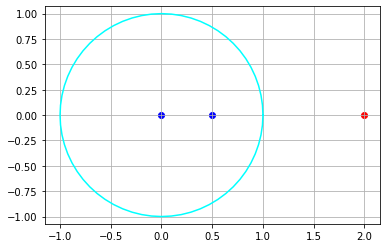

In [ ]:
draw(pole,centro,raio)

# <center/> <font color='violet'>**Testes:**</font> </center>

In [ ]:
expr1 = 1/(z**4*(z**4-16)*((3*z**2-48))**2)
polos = [0+0j, 2+0j, -2+0j, 4+0j, -4+0j, 0+2j, 0-2j]
ordens = [4, 1, 1, 2, 2, 1, 1]

print(integraltr(expr1, polos, ordens, 3+0j, 1.5))

In [ ]:
# Digite a função: 3*(z+1)/(z*(z-1)*(z-3))
# Digite o número de polos da função: 2
# Digite o valor do polo 1: 0+0j
# Digite o valor da ordem do polo 1: 1
# Digite o valor do polo 2: 1+0j
# Digite o valor da ordem do polo 2: 1
# digite o valor do raio de C3
# digite o valor do centro de C0+0j
#-2

# Digite a função: (4*z-5)/(z*(z-1))
# Digite o número de polos da função: 2
# Digite o valor do polo 1: 0+0j
# Digite o valor da ordem do polo 1: 1
# Digite o valor do polo 2: 1+0j
# Digite o valor da ordem do polo 2: 1
# digite o valor do raio de C2
# digite o valor do centro de C0+0j
# 4.00000000000000

# Digite a função: 1/(z**4*(z**4-16)*((3*z**2-48))**2)
# Digite o número de polos da função: 7
# Digite o valor do polo 1: 0+0j
# Digite o valor da ordem do polo 1: 4
# Digite o valor do polo 2: 2+0j
# Digite o valor da ordem do polo 2: 1
# Digite o valor do polo 3: -2+0j
# Digite o valor da ordem do polo 3: 1
# Digite o valor do polo 4: 4+0j
# Digite o valor da ordem do polo 4: 2
# Digite o valor do polo 5: -4+0j
# Digite o valor da ordem do polo 5: 2
# Digite o valor do polo 6: 0+2j
# Digite o valor da ordem do polo 6: 1
# Digite o valor do polo 7: 0-2j
# Digite o valor da ordem do polo 7: 1
# Digite o valor do raio de C: 1.5
# Digite o valor do centro de C: 3+0j
# 9.05770677414727e-6*I

# Digite a função: (z**4+1)/(2*I*z**2*(1-0.5*z)*(z-0.5))
# Digite o número de polos da função: 3
# Digite o valor do polo 1: 0+0j
# Digite o valor da ordem do polo 1: 2
# Digite o valor do polo 2: 2+0j
# Digite o valor da ordem do polo 2: 1
# Digite o valor do polo 3: 0.5+0j
# Digite o valor da ordem do polo 3: 1
# Digite o valor do raio de C: 1
# Digite o valor do centro de C: 0+0j
# O valor da integral é: I = 2.09439510239319